In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train= pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

# Extract function to convert features like Mileage, Engine, Power to numeric values
def extract(value):
    try:
        return float(value.split()[0])  # Use float, not int, to handle decimal values
    except:
        return np.nan  # Return NaN if there's an issue with conversion


# Apply the extraction function to specific columns
for c in ['Mileage', 'Engine', 'Power']:
    train[c] = train[c].apply(extract)
    test[c] = test[c].apply(extract)

# Drop rows with any NaN values
train = train.dropna()
test=test.dropna()

xf = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats','Price']
train=train[xf]
test=test[xf]
#normalisation
train=(train-train.mean())/(train.max()-train.min())
test=(test-test.mean())/(test.max()-test.min())

# Prepare features and target variables
xff = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
X_train = train[xff].values
y_train = train['Price']
X_test = test[xff].values
y_test = test['Price']

y_train=np.array([y_train])
X_test=X_test
y_test=np.array([y_test])


In [205]:
#step1
def initilaize_parameters(lenw):
    #w=np.random.randn(1,lenw)
    w=np.zeros((1,lenw))
    b=0
    return w,b

In [206]:
def forward_prop(X,w,b): #w-->1*n X-->n*m
    z=np.dot(w,X.T)+b        #z-->1*m
    return z


In [207]:
def cost_function(z,y):
    m=y.shape[1]
    J=(1/(2*m))*np.sum(np.square(z-y))
    return J

In [208]:
def back_prop(X,y,z):
    m=y.shape[1]
    dz=(1/m)*(z-y)
    dw=np.dot(dz,X)
    db=np.sum(dz)
    return dw,db

In [209]:
def gradient_descent_update(w,b,dw,db,learning_rate):
    w=w-learning_rate*dw
    b=b-learning_rate*db
    return w,b

In [210]:
def r_squared(y_true, y_pred):
    total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
    residual_variance = np.sum((y_true - y_pred) ** 2)
    return 1 - (residual_variance / total_variance)

In [211]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [212]:

def linear_regression_model(X_train,y_train,X_val,y_val,learning_rate,epochs):
    lenw=X_train.shape[1]
    w,b=initilaize_parameters(lenw)
    
    m_train=y_train.shape[1]
    m_val=y_train.shape[1]
    cost_trainl=[]
    for i in range(1,epochs+1):
        z_train=forward_prop(X_train,w,b)
        cost_train=cost_function(z_train,y_train)
        dw,db=back_prop(X_train,y_train,z_train)
        w,b=gradient_descent_update(w,b,dw,db,learning_rate)

        #store training cost in list
        if i%100==0:
            cost_trainl.append(cost_train)
        #MAE_train
        MAE_train=(1/m_train)*(np.sum(np.abs(z_train-y_train)))

        #cost_val,MAE_val
        z_val=forward_prop(X_val,w,b)
        cost_val=cost_function(z_val,y_val)
        MAE_val=(1/m_val)*(np.sum(np.abs(z_val-y_val)))

        #printing out cost_train,MAE_train,MAE_val.cost_val
        print("epochs "+str(i)+ '/'+str(epochs)+': ')
        print("Training cost: "+str(cost_train)+'|'+"Testing cost: "+str(cost_val))
        print("Training MAE: "+str(MAE_train)+'|'+"Testing MAE: "+str(MAE_val))
    
    print("w final: ",w)
    print("b final",b)
    y_pred=forward_prop(X_test,w,b)
    print("r2 score:(testing data)",r_squared(y_test,y_pred))
    print("mse:(testing data) ",mean_squared_error(y_test,y_pred))
    print("rmse: (testing data)",mean_squared_error(y_test,y_pred)**0.5)

    print(y_pred)

    y_predd=forward_prop(X_train,w,b)
    print("r2 score:(training dataset) ",r_squared(y_train,y_predd))
    print("mse:(training dataset) ",mean_squared_error(y_train,y_predd))
    print("rmse:(training dataset) ",mean_squared_error(y_train,y_predd)**0.5)
    plt.plot(cost_trainl)
    plt.xlabel('iterations(per 100)')
    plt.ylabel('Training cost')
    plt.title('Learning rate '+str(learning_rate))
    plt.show()

    return y_pred



epochs 1/5000: 
Training cost: 0.002496491202895138|Testing cost: 0.007307418786418109
Training MAE: 0.04534269351921513|Testing MAE: 0.02661290319178682
epochs 2/5000: 
Training cost: 0.002487657438000678|Testing cost: 0.0072899990184252545
Training MAE: 0.04523561363710306|Testing MAE: 0.02657058479371659
epochs 3/5000: 
Training cost: 0.0024788793205905925|Testing cost: 0.007272669822387366
Training MAE: 0.045128969757508304|Testing MAE: 0.02652840441686821
epochs 4/5000: 
Training cost: 0.002470156460626678|Testing cost: 0.007255430635686914
Training MAE: 0.045022681289022724|Testing MAE: 0.02648636156309981
epochs 5/5000: 
Training cost: 0.0024614884709931216|Testing cost: 0.007238280899607687
Training MAE: 0.04491682618487808|Testing MAE: 0.02644445573617444
epochs 6/5000: 
Training cost: 0.0024528749674736835|Testing cost: 0.007221220059305866
Training MAE: 0.044811657407779586|Testing MAE: 0.02640268644175247
epochs 7/5000: 
Training cost: 0.002444315568729068|Testing cost: 0.0

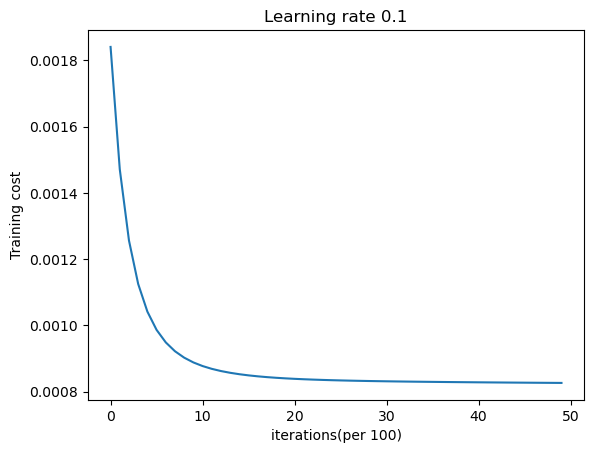

array([[-0.05644654, -0.05788422, -0.02076029, ...,  0.0007573 ,
         0.00133625, -0.00648379]])

In [213]:
linear_regression_model(X_train,y_train,X_test,y_test,0.1,5000)
